In [1]:
import requests
import pandas as pd
from datetime import date, timedelta

API_KEY = "jR7KZvPUjGDwCgbixrz1d_td5u4HcfKO"

end_date = date.today() - timedelta(days=1)
start_date = end_date - timedelta(days=90)

url = f"https://api.massive.com/v2/aggs/ticker/AAPL/range/1/day/{start_date}/{end_date}?adjusted=true&sort=asc&apiKey={API_KEY}"

data = requests.get(url).json()

apple_df = pd.DataFrame(data["results"])
apple_df.head()


,v,vw,o,c,h,l,t,n
0,49602794.0,273.3661,274.110,272.95,276.699,272.09,1763010000000,684410
1,47431331.0,273.1083,271.050,272.41,275.960,269.60,1763096400000,705592
2,45018260.0,267.9841,268.815,267.46,270.490,265.73,1763355600000,705791
3,45677278.0,267.7250,269.990,267.44,270.710,265.32,1763442000000,706583
4,40424492.0,269.3251,265.525,268.56,272.210,265.50,1763528400000,626377


In [4]:
apple_df["date"] = pd.to_datetime(apple_df["t"], unit="ms")
apple_df = apple_df.set_index("date").sort_index()

apple_df.index.name = "date"
apple_df.head()


,v,vw,o,c,h,l,t,n
date,,,,,,,,
2025-11-13 05:00:00,49602794.0,273.3661,274.110,272.95,276.699,272.09,1763010000000,684410
2025-11-14 05:00:00,47431331.0,273.1083,271.050,272.41,275.960,269.60,1763096400000,705592
2025-11-17 05:00:00,45018260.0,267.9841,268.815,267.46,270.490,265.73,1763355600000,705791
2025-11-18 05:00:00,45677278.0,267.7250,269.990,267.44,270.710,265.32,1763442000000,706583
2025-11-19 05:00:00,40424492.0,269.3251,265.525,268.56,272.210,265.50,1763528400000,626377


In [5]:
apple_df = apple_df.rename(columns={
    "o": "open",
    "c": "close",
    "h": "high",
    "l": "low",
})

apple_df[["open","close","high","low"]].head()


,open,close,high,low
date,,,,
2025-11-13 05:00:00,274.110,272.95,276.699,272.09
2025-11-14 05:00:00,271.050,272.41,275.960,269.60
2025-11-17 05:00:00,268.815,267.46,270.490,265.73
2025-11-18 05:00:00,269.990,267.44,270.710,265.32
2025-11-19 05:00:00,265.525,268.56,272.210,265.50


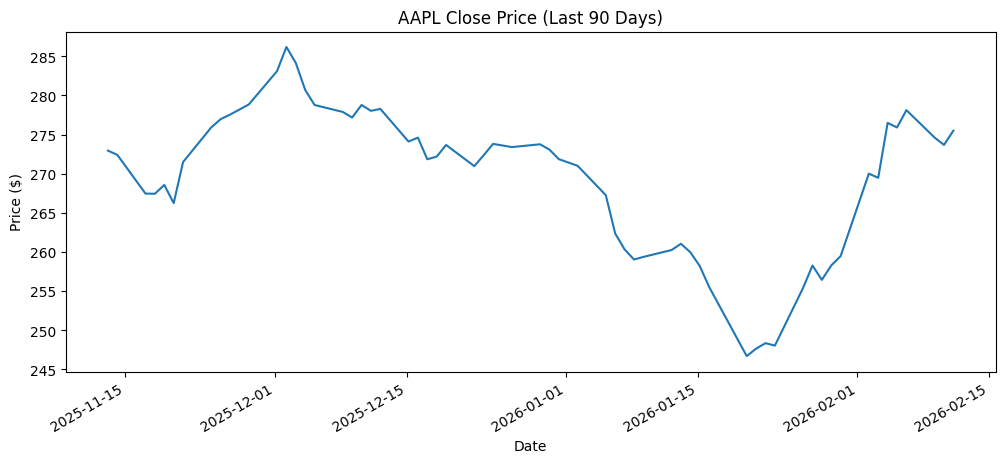

In [6]:
apple_df["close"].plot(figsize=(12,5), title="AAPL Close Price (Last 90 Days)")
plt.xlabel("Date")
plt.ylabel("Price ($)")
plt.show()

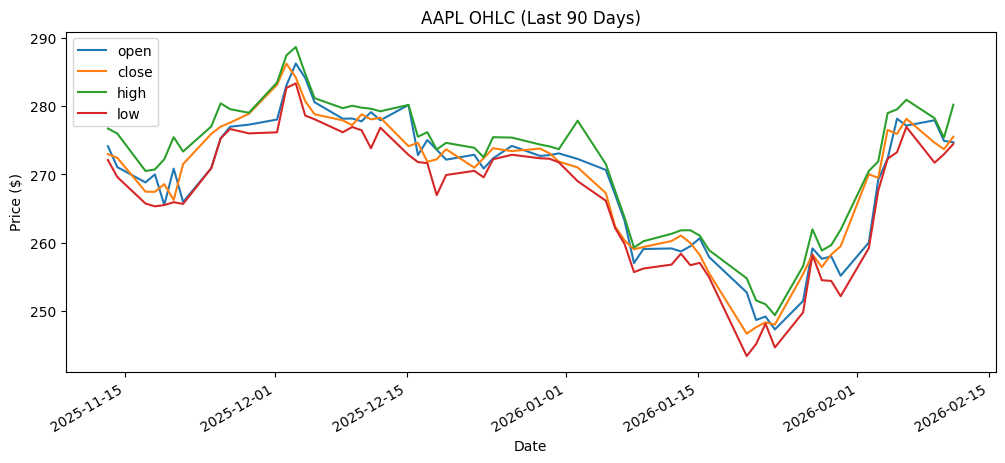

In [7]:
apple_df[["open","close","high","low"]].plot(figsize=(12,5), title="AAPL OHLC (Last 90 Days)")
plt.xlabel("Date")
plt.ylabel("Price ($)")
plt.show()

In [8]:
from nbresult import ChallengeResult

result = ChallengeResult('apple',
    index_name=apple_df.index.name,
    index_type=apple_df.index.dtype,
    columns=apple_df.columns
)
result.write()
print(result.check())


============================= test session starts ==============================
platform linux -- Python 3.12.9, pytest-8.3.4, pluggy-1.5.0 -- /home/mcelik/.pyenv/versions/3.12.9/envs/workintech/bin/python
cachedir: .pytest_cache
rootdir: /home/mcelik/code/data-stock-market/tests
plugins: typeguard-4.4.2, anyio-4.8.0
collecting ... collected 3 items

test_apple.py::TestApple::test_apple_df_columns PASSED                   [ 33%]
test_apple.py::TestApple::test_apple_df_index_is_timestamp PASSED        [ 66%]
test_apple.py::TestApple::test_apple_df_index_name_is_date PASSED        [100%]

============================== 3 passed in 0.41s ===============================


💯 You can commit your code:

git add tests/apple.pickle

git commit -m 'Completed apple step'

git push origin master



In [2]:
import requests

url = f"https://api.massive.com/v2/aggs/ticker/AMZN/range/1/day/{start_date}/{end_date}?adjusted=true&sort=asc&apiKey={API_KEY}"

amzn_data = requests.get(url).json()

amzn_df = pd.DataFrame(amzn_data["results"])
amzn_df.head()


,v,vw,o,c,h,l,t,n
0,41401738.0,239.2337,243.050,237.58,243.750,236.50,1763010000000,614029
1,38956669.0,235.7195,235.060,234.69,238.730,232.89,1763096400000,630488
2,59919018.0,231.8910,233.250,232.87,234.600,229.19,1763355600000,893854
3,60608442.0,224.6971,228.100,222.55,230.200,222.42,1763442000000,957649
4,58335643.0,221.6224,223.735,222.69,223.735,218.52,1763528400000,792329


In [6]:
amzn_df["date"] = pd.to_datetime(amzn_df["t"], unit="ms")
amzn_df = amzn_df.set_index("date").sort_index()
amzn_df = amzn_df.rename(columns={"o":"open","c":"close","h":"high","l":"low"})

amzn_df[["open","close","high","low"]].head()


,open,close,high,low
date,,,,
2025-11-13 05:00:00,243.050,237.58,243.750,236.50
2025-11-14 05:00:00,235.060,234.69,238.730,232.89
2025-11-17 05:00:00,233.250,232.87,234.600,229.19
2025-11-18 05:00:00,228.100,222.55,230.200,222.42
2025-11-19 05:00:00,223.735,222.69,223.735,218.52


In [7]:
import requests

meta_url = f"https://api.massive.com/v3/reference/tickers/META?apiKey={API_KEY}"
meta_data = requests.get(meta_url, timeout=30).json()

# Market cap'i güvenli şekilde çekelim:
meta_market_cap = meta_data.get("results", {}).get("market_cap")
meta_market_cap


1691488443222.1602

In [8]:
print(f"META market cap: ${meta_market_cap:,.0f}")
print(f"META market cap (trilyon): {meta_market_cap/1e12:.2f}T")


META market cap: $1,691,488,443,222
META market cap (trilyon): 1.69T


In [15]:
import requests
import pandas as pd

fin_url = (
    f"https://api.massive.com/vX/reference/financials"
    f"?ticker=AAPL&timeframe=quarterly&limit=4&sort=filing_date&apiKey={API_KEY}"
)

resp = requests.get(fin_url, timeout=30)
print("status:", resp.status_code)
print("content-type:", resp.headers.get("Content-Type"))
print(resp.text[:300])   # 200 değilse burada hata mesajını görürsün

fin = resp.json()
fin.keys()


status: 200
content-type: application/json
{"results":[{"start_date":"2025-09-28","end_date":"2025-12-27","filing_date":"2026-01-30","acceptance_datetime":"2026-01-30T11:01:32Z","timeframe":"quarterly","fiscal_period":"Q1","fiscal_year":"2026","cik":"0000320193","sic":"3571","tickers":["AAPL"],"company_name":"Apple Inc.","source_filing_url":


dict_keys(['results', 'status', 'request_id', 'next_url'])

In [16]:
results = fin.get("results", [])
df = pd.DataFrame(results)


if "filing_date" in df.columns:
    df["filing_date"] = pd.to_datetime(df["filing_date"])


def pick_revenue(row):
   
    candidates = [
        ("financials", "income_statement", "revenues"),
        ("financials", "income_statement", "revenue"),
        ("income_statement", "revenues"),
        ("income_statement", "revenue"),
        ("revenues",),
        ("revenue",),
    ]
    for path in candidates:
        cur = row
        ok = True
        for key in path:
            if isinstance(cur, dict) and key in cur:
                cur = cur[key]
            else:
                ok = False
                break
        if ok and cur is not None:
            return cur
    return None

df["gross_revenues"] = df.apply(lambda r: pick_revenue(r.to_dict()), axis=1)

# Son 4 çeyreği göster
cols = [c for c in ["filing_date", "fiscal_period", "fiscal_year", "gross_revenues"] if c in df.columns]
df[cols].head(4)


,filing_date,fiscal_period,fiscal_year,gross_revenues
0,2026-01-30,Q1,2026,"{'value': 143756000000.0, 'unit': 'USD', 'labe..."
1,2025-08-01,Q3,2025,"{'value': 94036000000.0, 'unit': 'USD', 'label..."
2,2025-05-02,Q2,2025,"{'value': 95359000000.0, 'unit': 'USD', 'label..."
3,2025-01-31,Q1,2025,"{'value': 124300000000.0, 'unit': 'USD', 'labe..."


In [18]:
df_out["gross_revenues_billion_usd"] = df_out["gross_revenues_value"] / 1e9
df_out = df_out.sort_values("filing_date", ascending=False)

df_out[["filing_date","fiscal_period","fiscal_year","gross_revenues_billion_usd"]]



,filing_date,fiscal_period,fiscal_year,gross_revenues_billion_usd
0,2026-01-30,Q1,2026,143.756
1,2025-08-01,Q3,2025,94.036
2,2025-05-02,Q2,2025,95.359
3,2025-01-31,Q1,2025,124.300


In [21]:
import requests

news_url = f"https://api.massive.com/v2/reference/news?ticker=TSLA&limit=1&apiKey={API_KEY}"
news = requests.get(news_url, timeout=30).json()


item = news.get("results", [None])[0]

item


{'id': 'b7e23c1b12eaf11e510a23693cd2f53094e6d287c86fd6b3dd3e5c928bbc0947',
 'publisher': {'name': 'The Motley Fool',
  'homepage_url': 'https://www.fool.com/',
  'logo_url': 'https://s3.massive.com/public/assets/news/logos/themotleyfool.svg',
  'favicon_url': 'https://s3.massive.com/public/assets/news/favicons/themotleyfool.ico'},
 'title': 'Buy 2 Vanguard Index Funds to Beat the S&P 500 in the Next Year, According to Wall Street',
 'author': 'Trevor Jennewine',
 'published_utc': '2026-02-12T09:12:00Z',
 'article_url': 'https://www.fool.com/investing/2026/02/12/buy-2-vanguard-index-funds-beat-sp-500-wall-street/?source=iedfolrf0000001',
 'tickers': ['VGT', 'VCR', 'NVDA', 'AAPL', 'MSFT', 'AMZN', 'TSLA', 'HD'],
 'image_url': 'https://g.foolcdn.com/image/?url=https%3A%2F%2Fg.foolcdn.com%2Feditorial%2Fimages%2F855848%2Fmarket-20.jpg&w=1200&op=resize',
 'description': 'Wall Street analysts project that the information technology and consumer discretionary sectors will outperform the S&P 500

In [20]:
title = item.get("title") if item else None
published = item.get("published_utc") if item else None
publisher = (item.get("publisher") or {}).get("name") if item else None

print("Title:", title)
print("Published:", published)
print("Publisher:", publisher)


Title: Buy 2 Vanguard Index Funds to Beat the S&P 500 in the Next Year, According to Wall Street
Published: 2026-02-12T09:12:00Z
Publisher: The Motley Fool


In [22]:
import requests
import pandas as pd

def create_stock_df_of_company(company_code: str, api_key: str, start_date: str, end_date: str) -> pd.DataFrame:
    url = (
        f"https://api.massive.com/v2/aggs/ticker/{company_code}/range/1/day/"
        f"{start_date}/{end_date}"
        f"?adjusted=true&sort=asc&limit=200&apiKey={api_key}"
    )
    data = requests.get(url, timeout=30).json()
    df = pd.DataFrame(data["results"])
    df["date"] = pd.to_datetime(df["t"], unit="ms")
    df = df.set_index("date").sort_index()
    df = df.rename(columns={"c": "close"})
    return df[["close"]]


In [23]:
from datetime import date, timedelta

end_date = (date.today() - timedelta(days=1)).isoformat()
start_date = (date.today() - timedelta(days=91)).isoformat()

tickers = ["GOOGL", "AAPL", "META", "AMZN"]

all_df = []
for tkr in tickers:
    tmp = create_stock_df_of_company(tkr, API_KEY, start_date, end_date)
    tmp = tmp.rename(columns={"close": tkr})
    all_df.append(tmp)

gafa_df = pd.concat(all_df, axis=1)
gafa_df.head()


,GOOGL,AAPL,META,AMZN
date,,,,
2025-11-13 05:00:00,278.57,272.95,609.89,237.58
2025-11-14 05:00:00,276.41,272.41,609.46,234.69
2025-11-17 05:00:00,285.02,267.46,602.01,232.87
2025-11-18 05:00:00,284.28,267.44,597.69,222.55
2025-11-19 05:00:00,292.81,268.56,590.32,222.69


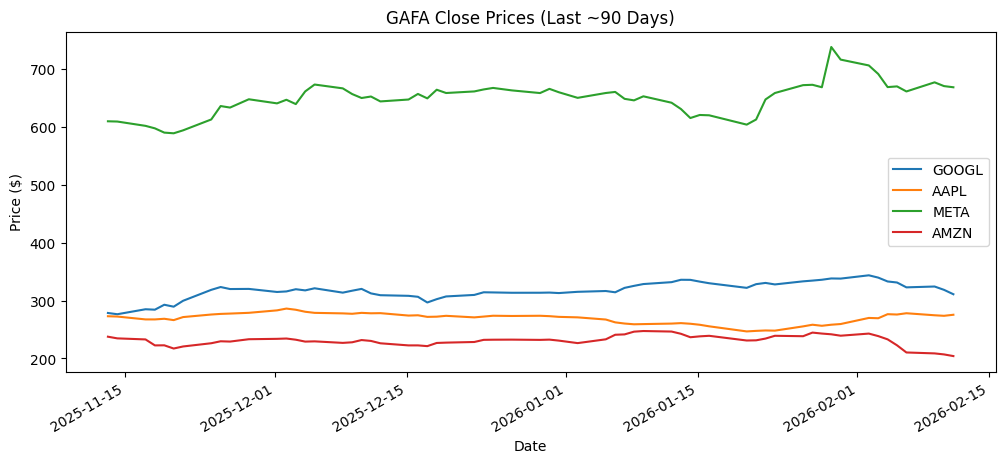

In [24]:
import matplotlib.pyplot as plt

gafa_df.plot(figsize=(12,5), title="GAFA Close Prices (Last ~90 Days)")
plt.xlabel("Date")
plt.ylabel("Price ($)")
plt.show()


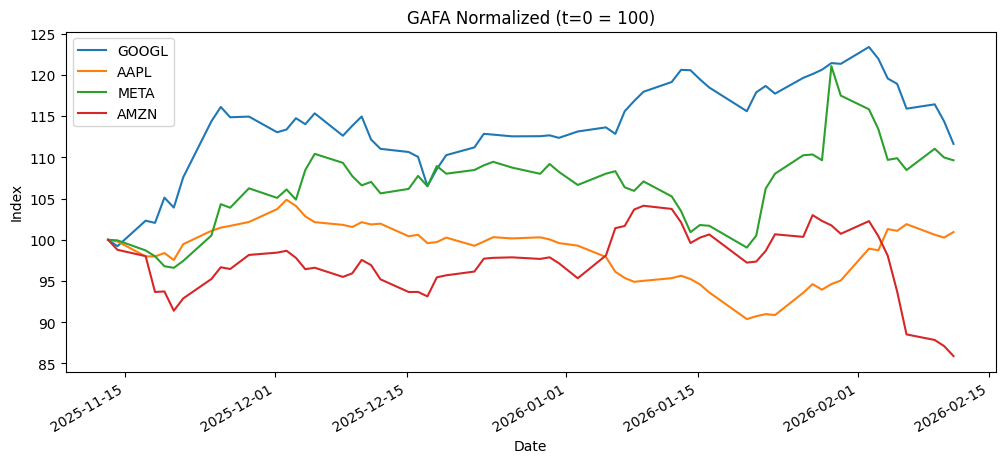

In [25]:
gafa_norm = (gafa_df / gafa_df.iloc[0]) * 100

gafa_norm.plot(figsize=(12,5), title="GAFA Normalized (t=0 = 100)")
plt.xlabel("Date")
plt.ylabel("Index")
plt.show()


In [26]:
import requests
import pandas as pd
from datetime import date, timedelta

def create_stock_df_of_company(company_code: str, api_key: str, days: int = 90) -> pd.DataFrame:
    end_date = date.today() - timedelta(days=1)     # dün
    start_date = end_date - timedelta(days=days)

    url = (
        f"https://api.massive.com/v2/aggs/ticker/{company_code}/range/1/day/"
        f"{start_date.isoformat()}/{end_date.isoformat()}"
        f"?adjusted=true&sort=asc&limit=200&apiKey={api_key}"
    )

    data = requests.get(url, timeout=30).json()
    df = pd.DataFrame(data["results"])
    df["date"] = pd.to_datetime(df["t"], unit="ms")
    df = df.set_index("date").sort_index()
    df = df.rename(columns={"c": "close"})
    return df[["close"]]
